In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys, os

In [2]:
filename = os.path.join("..", "data", "tiganj_2016_fig4_d.png")
with Image.open(filename) as im:
    data = np.array(im).astype(np.float64)[:, :, :3] / 255

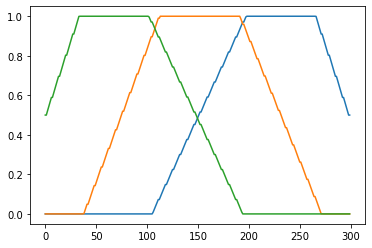

In [3]:
xs = np.linspace(0, 1, 300)
ref = cm.get_cmap("jet")(xs)[:, :3]
fig, ax = plt.subplots()
ax.plot(ref)

In [4]:
data_rec = np.argmin(np.sum(np.square(data[..., None] - ref.T), axis=2), axis=2) / ref.shape[0]

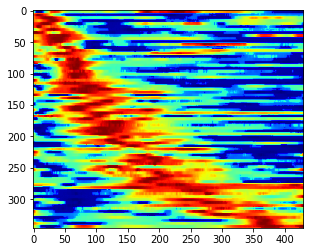

In [5]:
fig, ax = plt.subplots()
ax.imshow(data_rec, cmap="jet", vmin=0, vmax=1)

In [13]:
smpl_idcs0 = np.linspace(2, data_rec.shape[0] - 4, 73, dtype=int)
smpl_idcs1 = np.linspace(3, data_rec.shape[0] - 3, 73, dtype=int)
As = 0.5 * (data_rec[smpl_idcs0, :] + data_rec[smpl_idcs1, :])

np.savez(os.path.join('..', 'data', 'tiganj_2016_fig4_d.npz'), As)

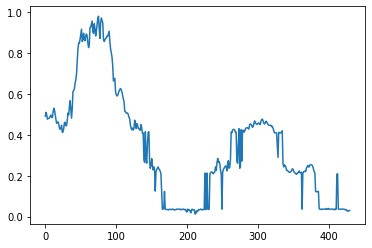

In [21]:
fig, ax = plt.subplots()
ax.plot(As[20].T);

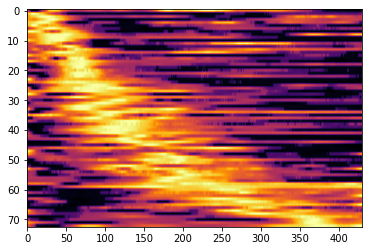

In [129]:
fig, ax = plt.subplots()
ax.imshow(As, cmap='inferno')
ax.set_aspect('auto')

In [113]:
def draw(As, rng=np.random):
    spread = As.shape[0] // 10
    i0 = rng.randint(As.shape[0] - spread + 1)
    i1 = i0 + rng.randint(spread)
    p = rng.uniform(0, 1)
    return p * As[i0] + (1 - p) * As[i1], int(p * i0 + (1 - p) * i1)

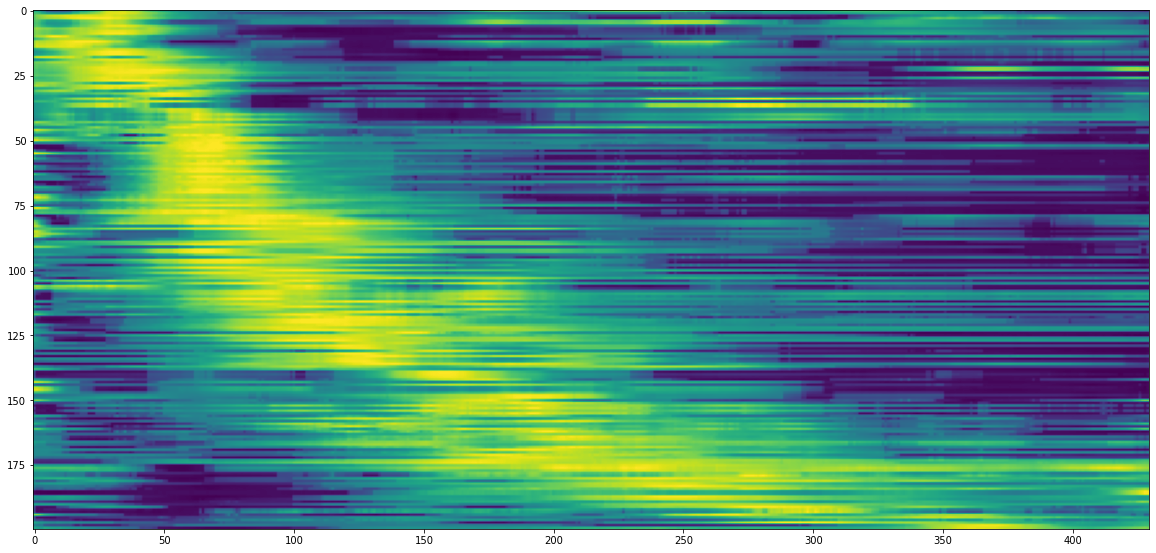

In [123]:
As_interp = np.zeros((200, As.shape[1]))
order = np.zeros(As_interp.shape[0], int)
for i in range(As_interp.shape[0]):
    As_interp[i], order[i] = draw(As)

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(As_interp[np.argsort(order)])